In [1]:
import numpy as np
from ase.io.trajectory import Trajectory
from ase.visualize import view
files = !ls /media/rbnfiles/dft/pts2/2x2supercellPtS2/strain/iso2/mangetic/*.traj
for i,j in enumerate(files):
    print("%d-->%s"%(i,j))

0-->/media/rbnfiles/dft/pts2/2x2supercellPtS2/strain/iso2/mangetic/PtS2_vacPt_magnetic_-0.005.traj
1-->/media/rbnfiles/dft/pts2/2x2supercellPtS2/strain/iso2/mangetic/PtS2_vacPt_magnetic_0.005.traj
2-->/media/rbnfiles/dft/pts2/2x2supercellPtS2/strain/iso2/mangetic/PtS2_vacPt_magnetic_-0.015.traj
3-->/media/rbnfiles/dft/pts2/2x2supercellPtS2/strain/iso2/mangetic/PtS2_vacPt_magnetic_0.015.traj
4-->/media/rbnfiles/dft/pts2/2x2supercellPtS2/strain/iso2/mangetic/PtS2_vacPt_magnetic_-0.01.traj
5-->/media/rbnfiles/dft/pts2/2x2supercellPtS2/strain/iso2/mangetic/PtS2_vacPt_magnetic_0.01.traj
6-->/media/rbnfiles/dft/pts2/2x2supercellPtS2/strain/iso2/mangetic/PtS2_vacPt_magnetic_0.025.traj
7-->/media/rbnfiles/dft/pts2/2x2supercellPtS2/strain/iso2/mangetic/PtS2_vacPt_magnetic_0.02.traj
8-->/media/rbnfiles/dft/pts2/2x2supercellPtS2/strain/iso2/mangetic/PtS2_vacPt_magnetic_0.035.traj
9-->/media/rbnfiles/dft/pts2/2x2supercellPtS2/strain/iso2/mangetic/PtS2_vacPt_magnetic_0.03.traj
10-->/media/rbnfiles/

# Trajectories 

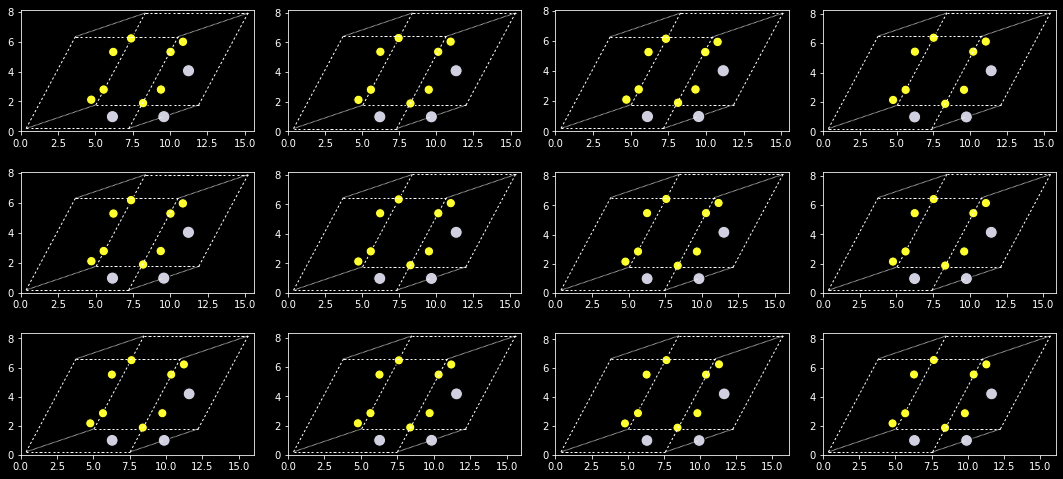

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from ase.visualize.plot import plot_atoms
from ase.spacegroup import crystal
from ase.gui.view import get_cell_coordinates

ncols = 4
nrows=(len(files)/ncols) if isinstance(len(files)/ncols, int)==False else int((len(files)/ncols)+1)
nrows=int(nrows)

cm = 1/2.54
px = 1/plt.rcParams['figure.dpi']  # pixel in inches

fig, ax = plt.subplots(nrows,ncols,figsize=(15,7))

count=0
for i in range(nrows):
    for j in range(ncols):
        if count < len(files):
            traj = Trajectory(files[count])[-1]
            plot_atoms(traj,ax[i,j],radii=0.3,rotation=('175x,15y,180z'))
            count+=1
        else:
            fig.delaxes(ax[i,j])
            break
fig.tight_layout()

plt.show()  

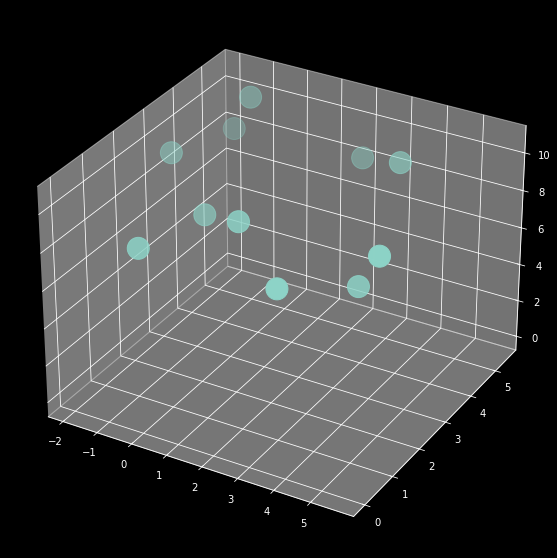

In [12]:
from ase.gui.view import get_cell_coordinates, get_bonds
from ase.gui.view import View

atoms=  Trajectory(files[count])[-1]
bondatoms = []
symbols = atoms.get_chemical_symbols()

for i in range(len(atoms)):
    for j in range(i):
        if (symbols[i] == symbols[j] == 'Pt' and
                atoms.get_distance(i, j) < 4.53):
            bondatoms.append((i, j))
        elif (symbols[i] == symbols[j] == 'S' and
              atoms.get_distance(i, j) < 2.99):
            bondatoms.append((i, j))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')


ax.scatter(atoms.positions[:,0],atoms.positions[:,1],atoms.positions[:,2],marker="o", s=22**2)
ax.plot(atoms.positions[0,0],atoms.positions[1,0],lw=10)


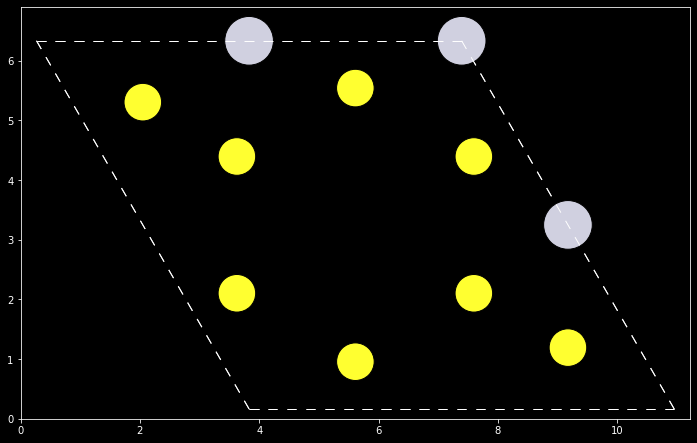

In [45]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
plt.subplots_adjust(wspace=0, hspace=0)

natoms=Trajectory(files[0])[-1]
plot_atoms(natoms,ax,radii=0.3,rotation=('0x,0y,180z'))
ax.plot([0,0,0],[1,1,1])

plt.show()

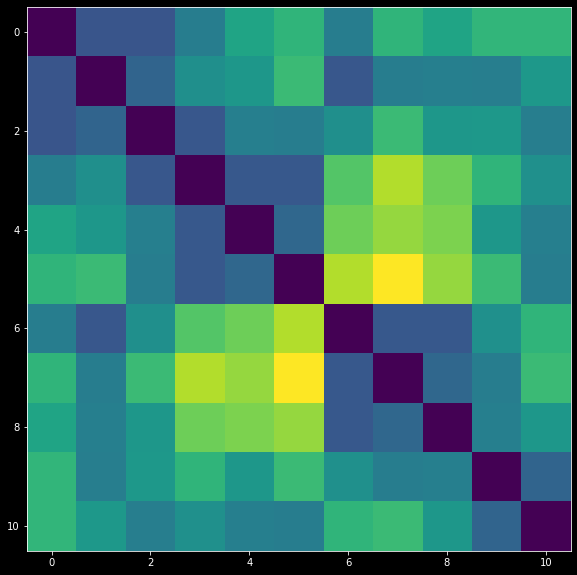

In [68]:
from ase.cell import Cell
from  ase.geometry.analysis import Analysis

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(atoms.get_all_distances())